_author_ = https://www.kaggle.com\shubhamp05

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
## Reading train and test from the input location
train = pd.read_csv('train.csv/train.csv')
#test = pd.read_csv('test.csv/test.csv')

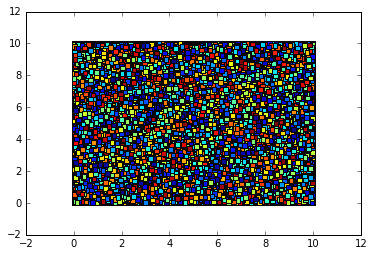

In [11]:
## We can look into this scatter plot but it is very hard to find any clusters, So I am adding more time features into it
plt.scatter(x=temp.x.values, y=temp.y.values, c=temp.place_id.values,marker='s')

##So this is a 10x10 grid of co-ordinates but with very large no of target, more that 10k+.

In [3]:
## if subsetting a dataset to look more closely, i going to select 25x25 from both axis
train_sub_25 = train.loc[(train.x.values >1)&(train.x.values <=1.25)&(train.y.values >2.5)&(train.y.values <=2.75)]

In [4]:
## Dividing the datasets based on time because Kaggle also uses the same thing behind the scenes
train = train_sub_25[train_sub_25.time <7.3e5]
val = train_sub_25[train_sub_25.time > 7.3e5]

In [78]:
## Now I am adding some more time features

train['hour'] = (train.time/60) % 24
train['weekday'] = (train.time/(60*24)) % 7
train['year'] = train.time/(60*24*365)
train['month'] = (train.time/(60*24*30)) % 12
train['day'] = (train.time/(60*24)) % 365

val['hour'] = (val.time/60) % 24
val['weekday'] = (val.time/(60*24)) % 7
val['year'] = val.time/(60*24*365)
val['month'] = (val.time/(60*24*30)) % 12
val['day'] = (val.time/(60*24)) % 365

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\

In [6]:
## Removing infrequent business_ids to get proper clusters in visualizations
def removing_infrequent_places(df):
    id,counts = np.unique(df.place_id,return_counts=True)
    id = id[counts >=500]
    df=df[np.in1d(df.place_id.values,id)]
    return(df)

In [ ]:
train = removing_infrequent_places(train)

In [8]:
## This plot shows us exact working hours as compared to (0-24)hrs, every business has different peak and idle hours.
## We can see adding hour feature makes a diffrence in analyzing the situation. It means hour has a direct impact on the check-ins

    
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs=train.x.values,ys=train.y.values, zs=train.hour.values,c=train.place_id.values,marker = 's')
ax.legend()

ax.set_xlabel('X co-ordinate')
ax.set_ylabel('Y Co-ordinate')
ax.set_zlabel('hour feature')

plt.show()

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


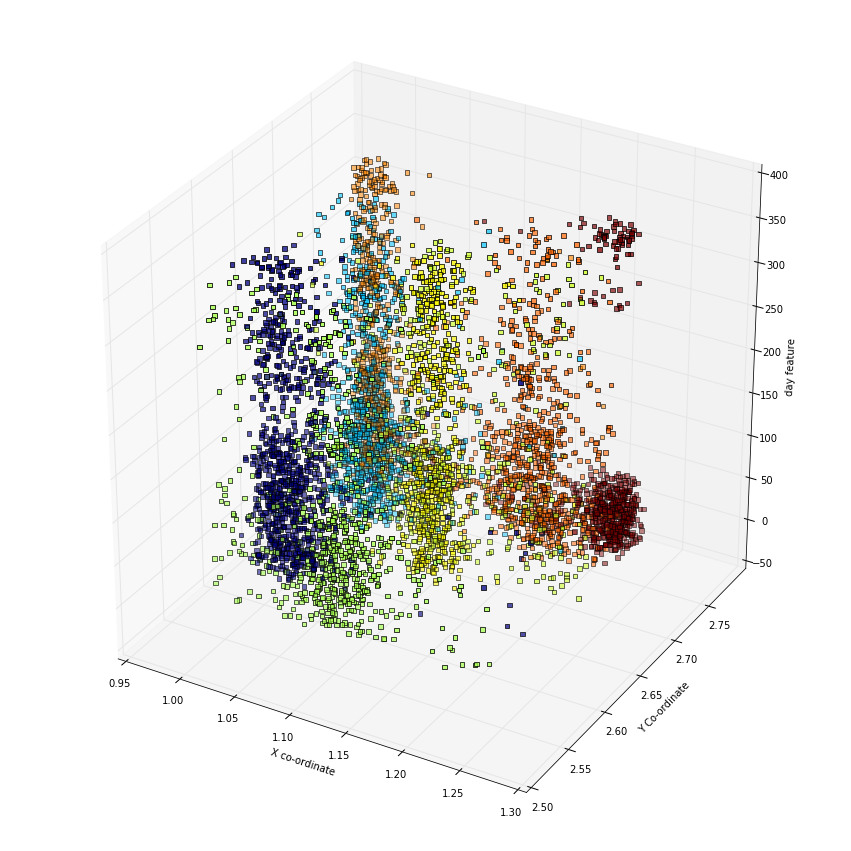

In [11]:
## Now I am going to analyze the problem with day as my z-dimension 


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs=train.x.values,ys=train.y.values, zs=train.day.values,c=train.place_id.values,marker = 's')
ax.legend()

ax.set_xlabel('X co-ordinate')
ax.set_ylabel('Y Co-ordinate')
ax.set_zlabel('day feature')

plt.show()

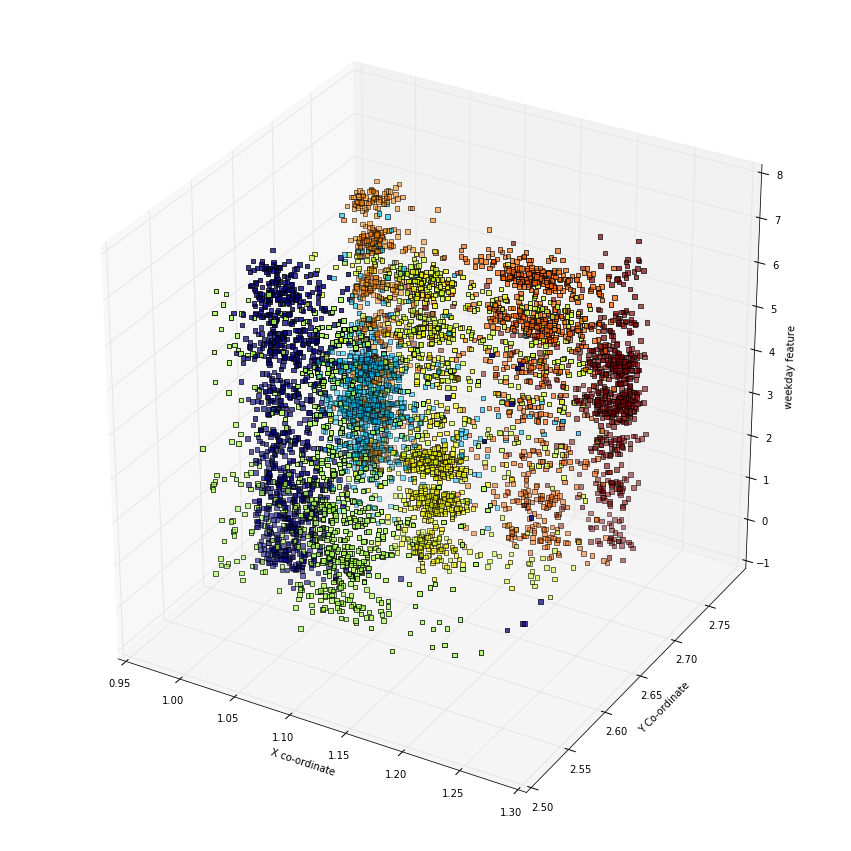

In [21]:
## Analyzing business place_ids with respect to weekday

train = removing_infrequent_places(train)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs=train.x.values,ys=train.y.values, zs=train.weekday.values,c=train.place_id.values,marker = 's')
ax.legend()

ax.set_xlabel('X co-ordinate')
ax.set_ylabel('Y Co-ordinate')
ax.set_zlabel('weekday feature')

plt.show()

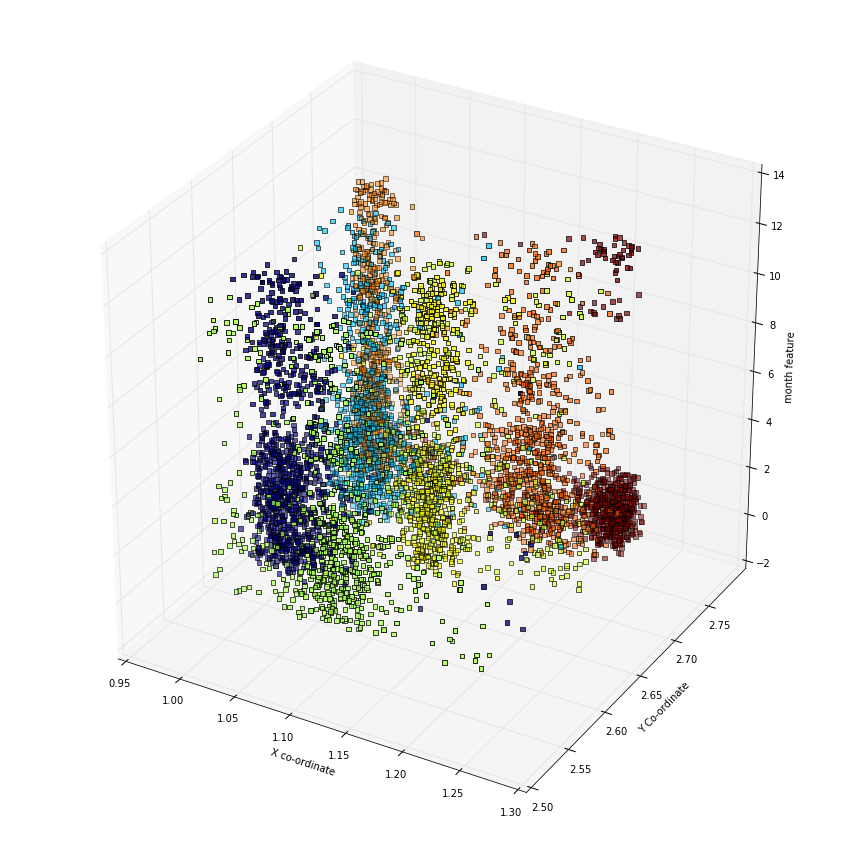

In [22]:
## Analyzing witg repect to month as Z-dimension

train = removing_infrequent_places(train)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs=train.x.values,ys=train.y.values, zs=train.month.values,c=train.place_id.values,marker = 's')
ax.legend()

ax.set_xlabel('X co-ordinate')
ax.set_ylabel('Y Co-ordinate')
ax.set_zlabel('month feature')

plt.show()

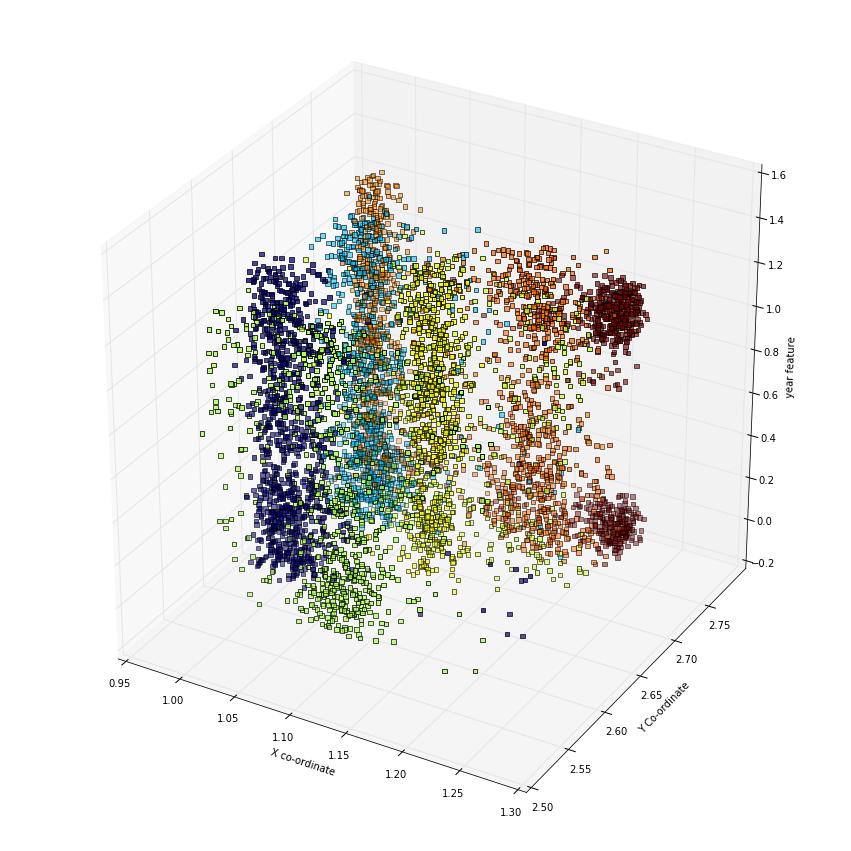

In [23]:
## Analyzing with repect to year as Z-dimension

train = removing_infrequent_places(train)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(xs=train.x.values,ys=train.y.values, zs=train.year.values,c=train.place_id.values,marker = 's')
ax.legend()

ax.set_xlabel('X co-ordinate')
ax.set_ylabel('Y Co-ordinate')
ax.set_zlabel('year feature')

plt.show()

In [25]:
## Analyzing feature importance with different ensemble techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

rfc = RandomForestClassifier(n_estimators=1000)
gbm = GradientBoostingClassifier(n_estimators=1000)
bgc = BaggingClassifier(n_estimators=1000)

In [89]:
## As data is too-large to accomodate for an forest or boosting technique.
## For analyzing purpose I am only selecting a part of data sampled with repect to time comnsist of most popular ID's.
le = LabelEncoder()
features = ['x','y','time','accuracy','hour','day','month','year','weekday']
y = le.fit_transform(train.place_id.values)
rfc.fit(train[features],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
importance = pd.DataFrame({'Features':features,'Importance':rfc.feature_importances_})

In [54]:
importance.set_index('Features',inplace=True)

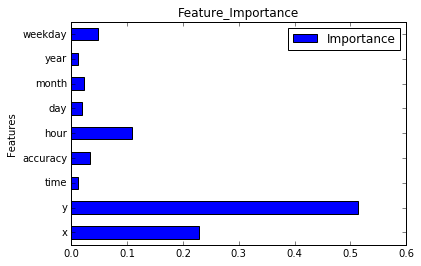

In [55]:
importance.plot(kind='barh',title='Feature_Importance')

In [56]:
## Now using GradientBoostingMachine

In [57]:
gbm.fit(train[features],train.place_id)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
gbm.feature_importances_

array([ 0.07581441,  0.10824487,  0.01652878,  0.04268533,  0.05008856,
        0.02109986,  0.01867144,  0.01754163,  0.04957511])

In [61]:
importance = pd.DataFrame({'Features':features,'Importance':gbm.feature_importances_})

In [67]:
importance.set_index('Features',inplace=True)

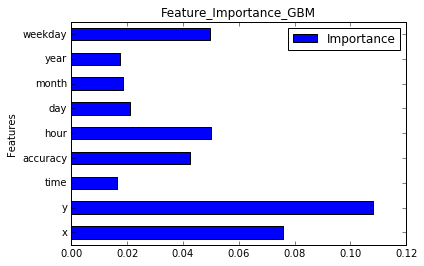

In [71]:
importance.plot(kind='barh',title='Feature_Importance_GBM')

In [82]:
## Checking mean accuracy on sampled validation dataset
true = val.place_id.values
val.drop(['row_id','place_id'],axis=1,inplace=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [105]:
preds = le.inverse_transform(np.argsort(rfc.predict_proba(val)))[:,::-1][:,0]

In [106]:
## Even on a very small dataset we get 30% accuracy
np.mean(true == preds)

0.30888888888888888

In [99]:
len(preds)

8